# 🧠 PyTorch Computer Vision
---
This notebook provides a comprehensive introduction to **PyTorch**, covering essential topics, theory, functions, and practical examples. 

📘 **Official Documentation**: [https://pytorch.org/docs/stable/index.html](https://pytorch.org/docs/stable/index.html)

📘 **Official Pytorch Cheatsheet**: [https://docs.pytorch.org/tutorials/beginner/ptcheat.html](https://docs.pytorch.org/tutorials/beginner/ptcheat.html)

📘 **Notebook Resource**: [https://www.learnpytorch.io/03_pytorch_computer_vision/](https://www.learnpytorch.io/03_pytorch_computer_vision/)

---

## 📑 Contents
1. Getting dataset
2. Preparing Dataloader
3. Model 0 - Make a baseline Model
4. Make Predictions and get model result
5. Setup device agnostic code
6. Model 1 - Build a model with non linearity
7. Model 2 - Building a Convolutional Neural Network (CNN)
8. Results Comparison 
9. Make and evaluate random predictions with best model
10. Make a confusion matrix
11. Save and Load best performing model


## 0. Computer vision libraries in PyTorch

Some PyTorch computer vision libraries:

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |


> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.


In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# 1. Getting a dataset

In [2]:
# Setup training data
train_data = torchvision.datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [3]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 Input and output shapes of a computer vision model

Let's see the image shape.

In [4]:
image.shape

torch.Size([1, 28, 28])

The shape of the image tensor is `[1, 28, 28]` or more specifically:

```
[color_channels=1, height=28, width=28]

In [5]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

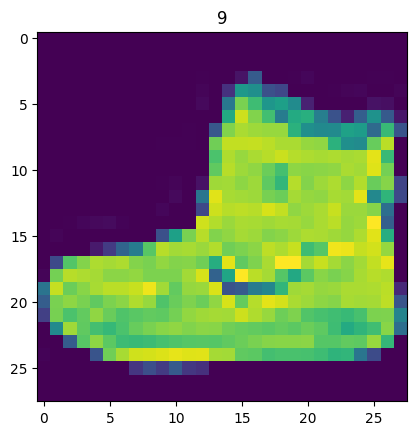

In [7]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label)

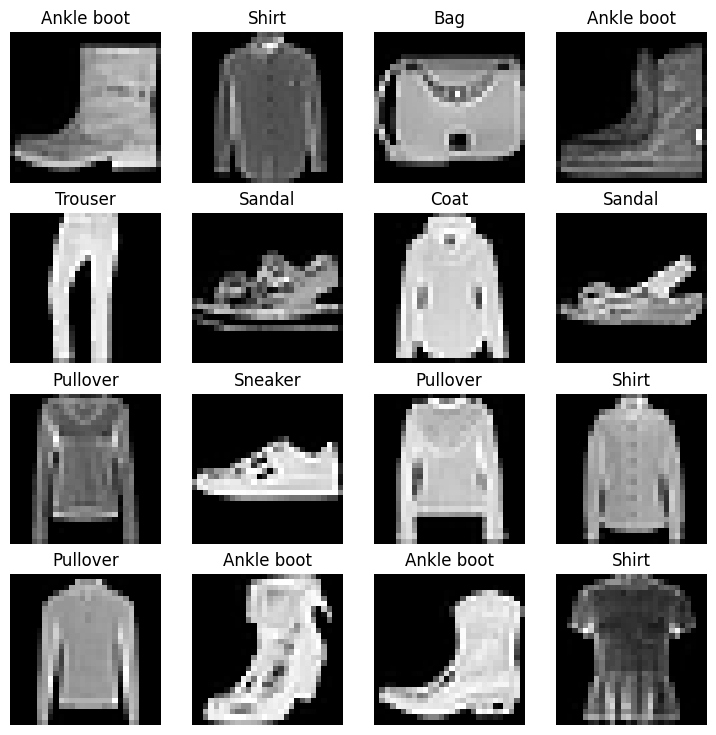

In [8]:
# Plot more images

torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare DataLoader

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset).

The `DataLoader` helps load data into a model.

For training and for inference.

It turns a large `Dataset` into a Python iterable of smaller chunks.

These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter because it's more computationally efficient.

With **mini-batches** (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

Let's create `DataLoader`'s for our training and test sets. 

In [9]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002383C033230>, <torch.utils.data.dataloader.DataLoader object at 0x000002383C428550>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [10]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


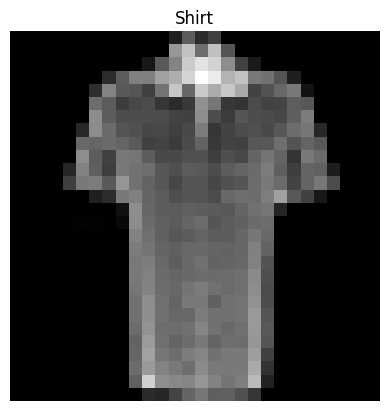

In [11]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

Data loaded and prepared!

Time to build a **baseline model** by subclassing `nn.Module`.

Our baseline will consist of two [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers.

To start things off we will use `nn.Flatten()` as it compresses the dimensions of a tensor into a single vector.

In [12]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


The `nn.Flatten()` layer took our shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

Because we've now turned our pixel data from height and width dimensions into one long **feature vector**.

And `nn.Linear()` layers like their inputs to be in the form of feature vectors.

Let's create our first model using `nn.Flatten()` as the first layer. 

In [13]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [14]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with 

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Setup loss, optimizer and evaluation metrics

Since we're working on a classification problem, let's bring the `Accuracy()` function in evaluation metrics from the [TorchMetrics package](https://torchmetrics.readthedocs.io/en/latest/).

In [15]:
# Import accuracy metric
from torchmetrics import Accuracy 

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

accuracy_fn = Accuracy(task = 'multiclass', num_classes=len(class_names)).to('cpu')

### 3.2 Creating a function to time our experiments

It's time to start training a model.

We'll train this model on the CPU but the next one on the GPU and alongside make a timing function to measure the time it takes our model to train on CPU versus using a GPU.


In [16]:
import time

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### 3.3 Creating a training loop and training a model on batches of data


Let's now create a training loop and a testing loop to train and evaluate our model. Since our data is now in batch form, we'll add another loop to loop through our data batches.

Our data batches are contained within our `DataLoader`s, `train_dataloader` and `test_dataloader` for the training and test data splits respectively.

A batch is `BATCH_SIZE` samples of `X` (features) and `y` (labels), since we're using `BATCH_SIZE=32`, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.

This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader. 

Let's step through it: 
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all.


In [17]:
from tqdm.auto import tqdm

# Set the seed and start timer
torch.manual_seed(42)
train_time_start_cpu = time.time()

# Set number of epochs
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

    # Training
    train_loss = 0

    # Add a loop to loop through training batches
    for batch, (X,y) in enumerate(train_dataloader):
        
        model_0.train()

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate Loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # acumulateively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # print out how many samples have been seen
        if batch % 400 == 0:
        
            print(f'Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples')
        
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss
            test_loss += loss_fn(test_pred, y)

            # 3. Calculate accuracy 
            test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

        # Calculation on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss and test accuracy by length of data dataloader
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f'\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc*100:.2f}%\n')

# Calculate training time      
train_time_end_cpu = time.time()
total_train_time_model_0 = print_train_time(start=train_time_start_cpu, 
                                           end=train_time_end_cpu,
                                           device=str(next(model_0.parameters()).device))


c:\Users\shahe\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:10<00:21, 10.90s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:21<00:10, 10.85s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:32<00:00, 10.87s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 32.614 seconds


## 4. Make predictions and get Model results

Since we're going to be building a few models, it's a good idea to write some code to evaluate them all in similar ways.

Namely, let's create a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [19]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
    
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """

    loss, acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:

            X, y = X.to(device), y.to(device)

            # Make predictions with the model
            y_pred = model(X)

            # Accumulates the loss and accuracy per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_pred.argmax(dim=1), y)

        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {'model_name': model.__class__.__name__,
            'model_loss': loss.item(),
            'model_acc': acc.item() * 100}


        

In [20]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device='cpu')

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651724815369}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [21]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

Linear means straight and non-linear means non-straight.
We will recreate a similar model to before, except this time we'll put non-linear functions (`nn.ReLU()`) in between each linear layer.

In [22]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)


In [23]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)
                              ).to(device=device)
next(model_1.parameters())


Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       device='cuda:0', requires_grad=True)

### 6.1 Setup loss, optimizer and evaluation metrics

In [24]:
from torchmetrics import Accuracy

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

accuracy_fn = Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device=device)

### 6.2 Functionizing training and test loops

Let's write training and test loops and put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call `.to(device)` on our feature (`X`) and target (`y`) tensors.

For the training loop we'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.

In [25]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
    
    train_loss, train_acc = 0,0
    model.to(device)
    model.train()
    
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)


        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate Loss and Accuracy
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_pred.argmax(dim=1), y)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer Step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train loss: {train_loss: .5f}   | Train Accuracy: {train_acc*100:.2f}%")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    
    test_loss, test_acc = 0,0
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for X,y in test_dataloader:
            
            # send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate Loss
        test_loss += loss_fn(test_pred, y)
        test_acc += accuracy_fn(test_pred, y)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc*100:.2f}%\n")


In [26]:
torch.manual_seed(42)

# Measure Time
import time

train_time_start_gpu = time.time()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device
               )
    
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_gpu = time.time()
total_train_time_model_1 = print_train_time(train_time_start_gpu,
                                            train_time_end_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss:  1.09199   | Train Accuracy: 61.34%


 33%|███▎      | 1/3 [00:19<00:38, 19.50s/it]

Test loss: 0.68635 | Test accuracy: 75.00%

Epoch: 1
---------
Train loss:  0.78101   | Train Accuracy: 71.93%


 67%|██████▋   | 2/3 [00:38<00:19, 19.11s/it]

Test loss: 0.39784 | Test accuracy: 87.50%

Epoch: 2
---------
Train loss:  0.67027   | Train Accuracy: 75.94%


100%|██████████| 3/3 [00:56<00:00, 19.00s/it]

Test loss: 0.39766 | Test accuracy: 87.50%

Train time on cuda: 57.000 seconds


In [27]:
torch.manual_seed(42)

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996755599976}

## 7. Model 2: Building a Convolutional Neural Network (CNN)

It's time to create a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements. 

In [28]:
# Create convolutional neural network

class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
    
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [29]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)


In [30]:
image.shape

torch.Size([1, 28, 28])

In [31]:
# Creating a random image tensor to go through our model
torch.manual_seed(42)
random_image_tensor = torch.randn(size=(1,28,28))
random_image_tensor.shape

torch.Size([1, 28, 28])

In [32]:
model_2(random_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0505, -0.0729,  0.0821, -0.0451, -0.0044,  0.0383,  0.0061, -0.0016,
         -0.0127, -0.0081]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through the `nn.Conv2d()`

In [33]:
torch.manual_seed(42)

# Create batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test image:\n {test_image}')

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [34]:
torch.manual_seed(42)
# Create single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# Pass data throguh the convolutional layer

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [35]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

### 7.2 Stepping through `nn.Maxpool2d()`

In [36]:
# Print original image shape
print(f"Test image original shape: {test_image.shape}")

# Print original image shape with unsqueezed dimension
print(f"Test image original shape: {test_image.unsqueeze(0).shape}")

# Create sample nn.Maxpool2d Layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f'Test image shape after going through conv_layer(): {test_image_through_conv.shape}')

# Pass data through just the conv_layer
test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(f'Test image shape after going through conv_layer() and maxpool(): {test_image_through_conv_and_maxpool.shape}')


Test image original shape: torch.Size([3, 64, 64])
Test image original shape: torch.Size([1, 3, 64, 64])
Test image shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Test image shape after going through conv_layer() and maxpool(): torch.Size([1, 10, 31, 31])


### 7.3 Setup a loss function and optimizer

In [37]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

accuracy_fn = Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device=device)


In [38]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and testing `model_2` using our training and testing functions

In [39]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
import time 

train_time_start_gpu = time.time()

# Train and Test model
epochs = 3

for epoch in tqdm(range(epochs)):
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_2,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)
    
train_time_end_gpu = time.time()

total_train_time_model_2 = print_train_time(start=train_time_start_gpu,
                                            end=train_time_end_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss:  0.60795   | Train Accuracy: 77.94%


 33%|███▎      | 1/3 [00:22<00:45, 22.67s/it]

Test loss: 0.16910 | Test accuracy: 93.75%

Train loss:  0.36011   | Train Accuracy: 87.10%


 67%|██████▋   | 2/3 [00:45<00:22, 22.67s/it]

Test loss: 0.16994 | Test accuracy: 93.75%

Train loss:  0.32206   | Train Accuracy: 88.39%


100%|██████████| 3/3 [01:08<00:00, 22.76s/it]

Test loss: 0.16603 | Test accuracy: 87.50%

Train time on cuda: 68.270 seconds


In [40]:
# Get model_2 results

model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3265960216522217,
 'model_acc': 88.16893100738525}

# 8. Compare Results

In [41]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426517
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.326596,88.168931


In [42]:
compare_results["training time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

In [43]:
compare_results

,model_name,model_loss,model_acc,training time
0,FashionMNISTModelV0,0.476639,83.426517,32.613560
1,FashionMNISTModelV1,0.685001,75.019968,57.000069
2,FashionMNISTModelV2,0.326596,88.168931,68.270497


Text(0, 0.5, 'Model')

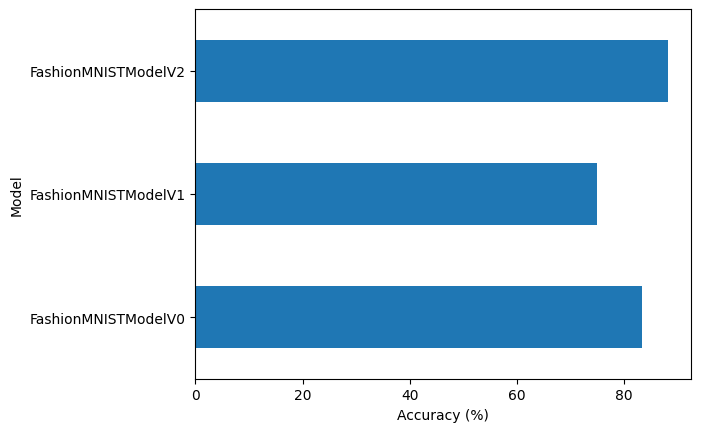

In [44]:
# Visualize our model results

compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")

## 9. Make and evaluate random predictions with best model



In [45]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device
):
    
    pred_probs = []
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device=device)

            # Forward pass (Model outputs raw logits)
            pred_logits = model(sample)

            # Get prediction probability
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            # Get pred_prob off the GPU for furter calculations
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)


In [46]:
import random
#random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View first sampele shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

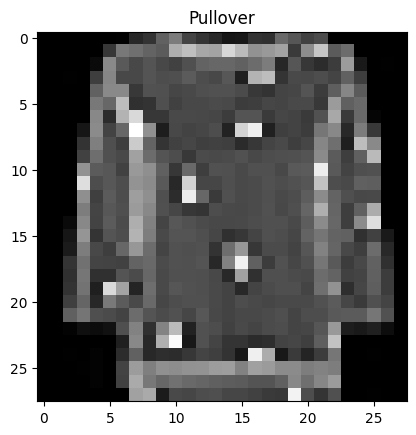

In [47]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]]) 

In [48]:
# Make Predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_probs[:2]

tensor([[1.7818e-01, 7.2403e-03, 2.5713e-01, 1.4880e-02, 5.0267e-04, 9.5785e-05,
         4.9855e-01, 3.3891e-04, 4.1828e-02, 1.2467e-03],
        [2.1611e-01, 5.0521e-06, 2.6726e-05, 5.2418e-04, 1.4695e-03, 2.7166e-08,
         7.8181e-01, 5.3870e-07, 5.2102e-05, 5.0905e-07]])

In [49]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 6, 5, 0, 2, 7, 8, 8, 0])

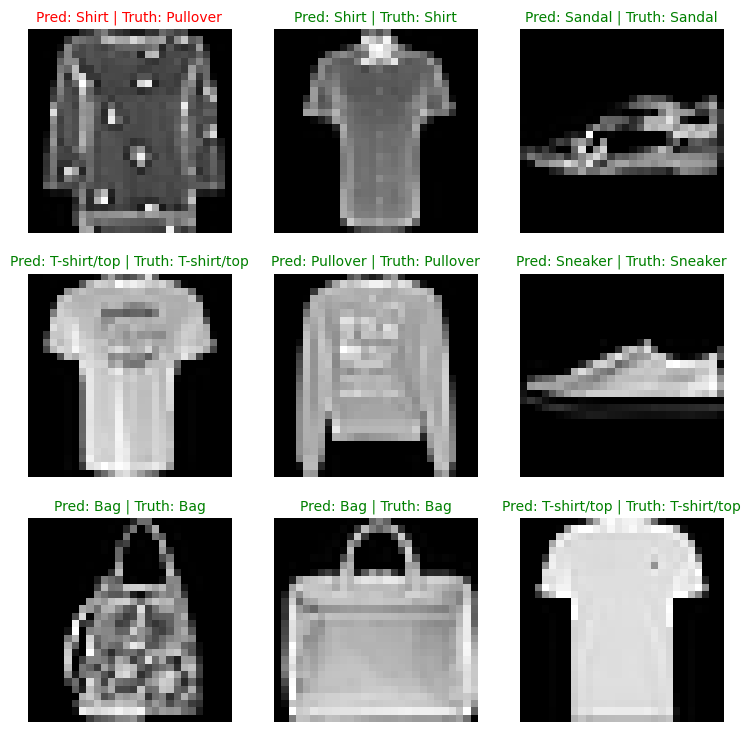

In [50]:
# Plot predictions

plt.figure(figsize=(9,9))
nrwos = 3
ncols = 3

for i, sample in enumerate(test_samples):
    
    # Create subplot
    plt.subplot(nrwos, ncols, i+1)

    # Plot target image
    plt.imshow(sample.squeeze(), cmap='gray')

    # Find prediction in text form
    pred_label = class_names[pred_classes[i]]

    # Get truth label
    truth_label = class_names[test_labels[i]]

    # Create title for plot
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'

    # Check for equality between pred and truth and change color of text accordingly

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')

    else:
        plt.title(title_text, fontsize=10, c='r')
    plt.axis(False)

# 10. Making a confusion matrix

In [51]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making Predicitons...'):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_logit = model_2(X)
        
        # Turn predictions from logits -> prediction probabilities
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())


# Concat list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


Making Predicitons...: 100%|██████████| 313/313 [00:01<00:00, 164.93it/s]


tensor([9, 2, 1,  ..., 8, 1, 2])

In [52]:
len(y_pred_tensor)

10000

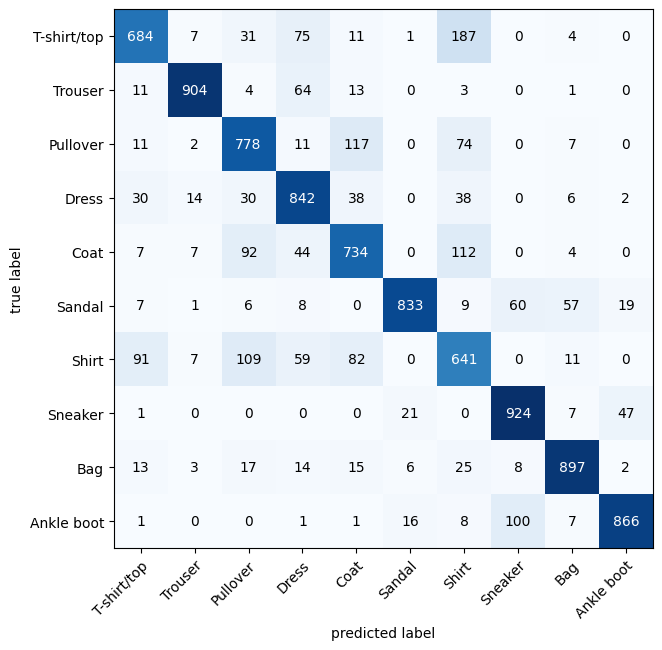

In [53]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)
 
# plot the confusion matrix

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)


## 11. Save and load best performing Model

In [56]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = '03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vision_model_2.pth


In [57]:
# Create new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [58]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3265960216522217,
 'model_acc': 88.16893100738525}

In [59]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3265960216522217,
 'model_acc': 88.16893100738525}

In [60]:
# Check if results are close to each other

torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol=1e-08)

tensor(True)